In [ ]:
!pip install beautifulsoup4
!pip install numpy
!pip install requests
!pip install spacy
!pip install trafilatura
!pip install wordcloud

In [ ]:
from bs4 import BeautifulSoup
import json
import numpy as np
import requests
from requests.models import MissingSchema
import spacy
import trafilatura


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
from trafilatura.spider import focused_crawler
homepage = 'https://www.bulk.com/uk/'
# starting a crawl
to_visit, known_urls = focused_crawler(homepage, max_seen_urls=10, max_known_urls=20)
# resuming a crawl
to_visit, known_urls = focused_crawler(homepage, max_seen_urls=10, max_known_urls=20, todo=to_visit, known_links=known_urls)

In [ ]:
to_visit, known_urls = list(to_visit), sorted(known_urls)
print(to_visit)

['https://www.neat-nutrition.com/blogs/news/9-practical-things-you-can-do-every-day-to-conquer-overthinking', 'https://www.neat-nutrition.com/products/vegan-protein-powder-plant', 'https://www.neat-nutrition.com/pages/delivery-policy', 'https://www.neat-nutrition.com/products/immune-support-supplement', 'https://www.neat-nutrition.com/products/shaker-bottle-400ml', 'https://www.neat-nutrition.com/blogs/news/rest-day-bucket-list-6-activities-your-mind-and-body-will-thank-you-for', 'https://www.neat-nutrition.com/pages/youthdiscount', 'https://www.neat-nutrition.com/pages/neat-rewards', 'https://www.neat-nutrition.com/pages/our-story', 'https://www.neat-nutrition.com/blogs/recipes', 'https://www.neat-nutrition.com/products/sleep-relax-supplement', 'https://www.neat-nutrition.com/blogs/news', 'https://www.neat-nutrition.com/collections/all-protein', 'https://www.neat-nutrition.com/products/focus-energy-supplement', 'https://www.neat-nutrition.com/blogs/news/the-not-so-secret-trick-to-a-re

In [ ]:
len(known_urls)

21

In [ ]:
def beautifulsoup_extract_text_fallback(response_content):
    
    '''
    This is a fallback function, so that we can always return a value for text content.
    Even for when both Trafilatura and BeautifulSoup are unable to extract the text from a 
    single URL.
    '''
    
    # Create the beautifulsoup object:
    soup = BeautifulSoup(response_content, 'html.parser')
    
    # Finding the text:
    text = soup.find_all(text=True)
    
    # Remove unwanted tag elements:
    cleaned_text = ''
    blacklist = [
        '[document]',
        'noscript',
        'header',
        'html',
        'meta',
        'head', 
        'input',
        'script',
        'style',]

    # Then we will loop over every item in the extract text and make sure that the beautifulsoup4 tag
    # is NOT in the blacklist
    for item in text:
        if item.parent.name not in blacklist:
            cleaned_text += '{} '.format(item)
            
    # Remove any tab separation and strip the text:
    cleaned_text = cleaned_text.replace('\t', '')
    return cleaned_text.strip()
    

def extract_text_from_single_web_page(url): 
    downloaded_url = trafilatura.fetch_url(url)
    a = trafilatura.extract(downloaded_url, trafilatura.extract(downloaded_url, output=True, include_comments=False)) 
    return a

In [ ]:
data = []

for url in to_visit:
    try:
      data.append(extract_text_from_single_web_page(url))
    except Exception as e:
      print(e)

ERROR:trafilatura.downloads:not a 200 response: 403 for URL https://help.bulk.com/hc/en-gb/articles/360000019838-Privacy-Policy


('incompatible input type', <class 'NoneType'>)


ERROR:trafilatura.downloads:not a 200 response: 403 for URL https://help.bulk.com/hc/en-gb/categories/115000292449-DELIVERY


('incompatible input type', <class 'NoneType'>)


ERROR:trafilatura.downloads:not a 200 response: 403 for URL https://help.bulk.com/hc/en-gb/articles/208192485-Terms-Conditions


('incompatible input type', <class 'NoneType'>)


ERROR:trafilatura.downloads:not a 200 response: 403 for URL https://help.bulk.com/hc/en-gb/articles/360018080137


('incompatible input type', <class 'NoneType'>)


ERROR:trafilatura.downloads:not a 200 response: 403 for URL https://help.bulk.com/hc/en-gb


('incompatible input type', <class 'NoneType'>)


ERROR:trafilatura.downloads:not a 200 response: 403 for URL https://help.bulk.com/hc/en-gb/articles/115001601865-What-are-my-options-for-delivery-and-how-much-will-I-be-charged-


('incompatible input type', <class 'NoneType'>)


In [ ]:
len(data)

182

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Generate a word cloud image.
wordcloud = WordCloud(width=1600, height=800, background_color='white', collocations=False).generate(
    ' '.join(data))

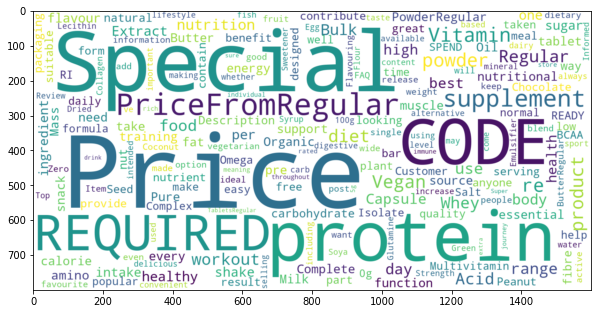

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Backfill 2020-09-23
- Focus: **Marketing**
- Add visualization for Marketing


### Backfill 2020-10-21
- Focus: **Clustering**
- Improve influencer clustering around Clustering


### Backfill 2020-11-05
- Focus: **Influencer**
- Enhance similarity analysis for Influencer


### Backfill 2020-12-23
- Focus: **Clustering**
- Add visualization for Clustering


### Backfill 2021-02-12
- Focus: **Influencer**
- Add visualization for Influencer
